In [1]:
# TODO:
# Save the matplotlib plots
# save the models

In [2]:
# Question :- 
# In this assignment candidate will be able to create a model that can detect coronavirus patients 
# from X-ray reports

# Just info:-
# I have already download and unzip the kaggle dataset. It's name is Covid19-dataset.

In [21]:
# Importing all the necessary libraries
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential, layers
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [4]:
os.getcwd()

'c:\\IA_SEM_3\\TCS_Sem_3_IA1_IA2\\TCS_Sem-3\\IA_2'

In [5]:
# Saving the path of the train directory and test directory as string.

train_dir_path = "C:/IA_SEM_3/TCS_Sem_3_IA1_IA2/TCS_Sem-3/IA_2/Covid19-dataset/train"
test_dir_path = "C:/IA_SEM_3/TCS_Sem_3_IA1_IA2/TCS_Sem-3/IA_2/Covid19-dataset/test"

In [6]:
image_height = 224
image_width = 224
batch_size = 32

In [7]:
X_train = []

for folder in os.listdir(train_dir_path):
    sub_path = train_dir_path + "/" + folder
    for image in os.listdir(sub_path):
        image_train = sub_path + "/" + image
        image = cv2.imread(image_train)
        image = cv2.resize(image, (image_height, image_width)) # ResNet-50 needs an input shape of 224 x 224
        X_train.append(image)



In [8]:
X_test = []

for folder in os.listdir(test_dir_path):
    sub_test = test_dir_path + "/" + folder
    for image in os.listdir(sub_test):
        image_test = sub_test + "/" + image
        image = cv2.imread(image_test)
        image = cv2.resize(image, (image_height, image_width))
        X_test.append(image)

In [9]:
print("Maximum value of the first image in X_train: ", float(np.max(X_train[0])))
print("Minumum value of the first image in X_train: ", float(np.min(X_train[0])))

print("Maximum value of the first value in X_test: ", float(np.max(X_test[0])))
print("Minimum value of the first image in X_test: ", float(np.min(X_test[0])))

Maximum value of the first image in X_train:  255.0
Minumum value of the first image in X_train:  0.0
Maximum value of the first value in X_test:  255.0
Minimum value of the first image in X_test:  0.0


In [10]:
# Preprocessing the x_train and x_test

# train = np.array(X_train) / 255.0
# test = np.array(X_test) / 255.0

In [11]:
train_data = ImageDataGenerator(rescale = 1.0 / 255.0, validation_split = 0.2)
test_data = ImageDataGenerator(rescale = 1.0 / 255.0)

In [12]:
train_set = train_data.flow_from_directory(
    train_dir_path,
    subset = "training",
    batch_size = batch_size,
    target_size = (image_height, image_width),
    class_mode = "categorical" # sparse
)
validation_set = train_data.flow_from_directory(
    train_dir_path,
    subset = "validation",
    batch_size = batch_size,
    target_size = (image_height, image_width),
    class_mode = "categorical" # sparse
)
test_set = test_data.flow_from_directory(
    test_dir_path,
    batch_size = batch_size,
    target_size = (image_height, image_width),
    class_mode = "categorical" # sparse
)

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [13]:
print(f" { len(test_set.classes) } Number images belonging to { len(test_set.class_indices) } classes in test data set. ")
print(f" { len(train_set.classes) } Number of images belonging to { len(train_set.classes) } classes in train data set. ")
print(f" { len(validation_set.classes) } Number of images belonging to { len(validation_set.classes) } classes in validation data set. ")

 66 Number images belonging to 3 classes in test data set. 
 201 Number of images belonging to 201 classes in train data set. 
 50 Number of images belonging to 50 classes in validation data set. 


In [14]:
print(train_set.class_indices)
print(test_set.class_indices)
print(validation_set.class_indices)

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}
{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}
{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}


In [15]:
y_train = train_set.classes 
y_validation = validation_set.classes
y_test = test_set.classes 

print("y_train :-", y_train, end = "\n\n")
print("y_val :- ", y_validation, end = "\n\n")
print("y_test :- ", y_test)

y_train :- [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

y_val :-  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]

y_test :-  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


C:\Users\admin\AppData\Local\Temp\ipykernel_908\775316349.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


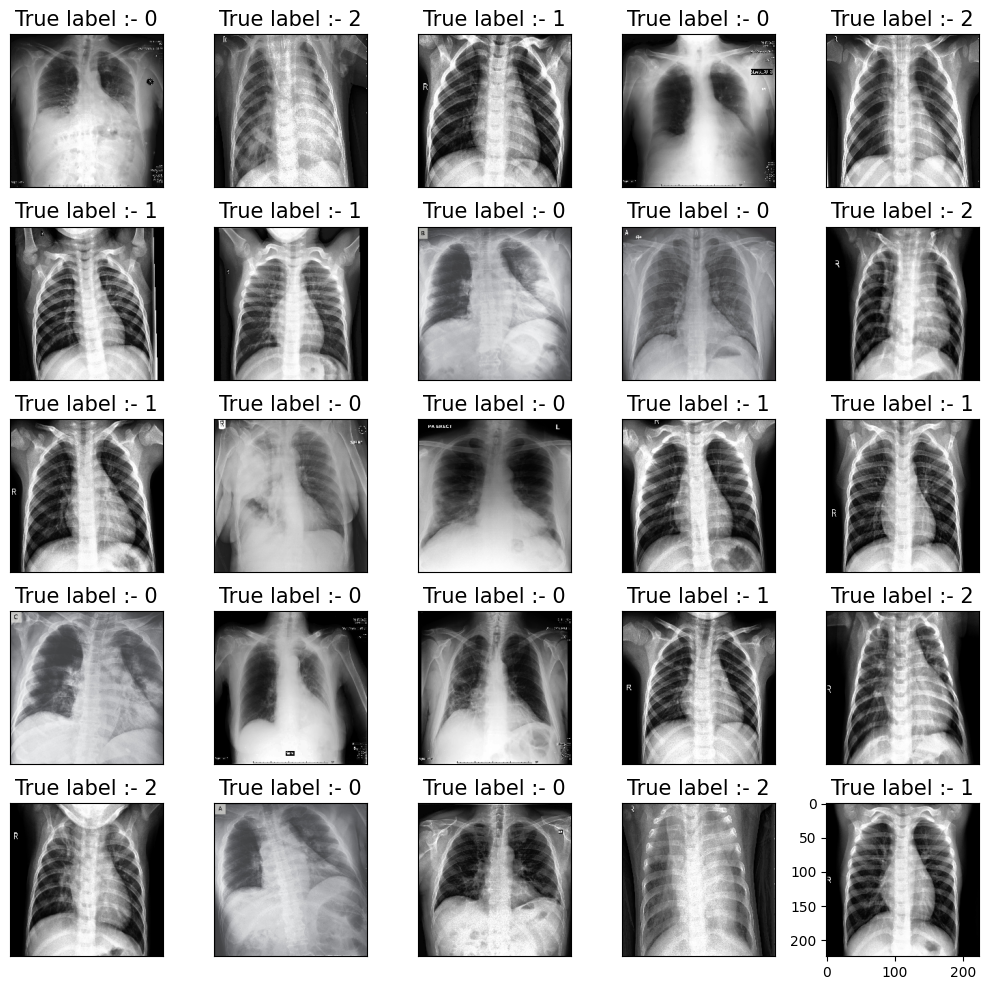

In [16]:
# Get a batch of images and labels from the test_set
batch_images, batch_one_hot_labels  = next(test_set)

# Convert one-hot encoded labels to integer labels
batch_labels = np.argmax(batch_one_hot_labels, axis=1)

# Display the images and labels
plt.figure(figsize = (10, 10))
for i in range(0, 25, 1):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5, 5, i + 1)
    plt.imshow(batch_images[i])
    plt.title(f"True label :- {batch_labels[i]}", fontsize = 15)


plt.tight_layout()
plt.show()

In [17]:
# ResNet50 Model Transer Learning

resnet_50 = ResNet50(
    include_top = False, 
    input_shape = (224, 224, 3),
    weights = "imagenet"
    )

for layers in resnet_50.layers:
    layers.trainable = False

In [18]:
# Early Stopping

early_stopping = EarlyStopping(
    monitor = "val_loss",
    patience = 10,
    restore_best_weights = True,
    min_delta = 0.001,
    verbose = 0
)

In [22]:
resnet_50_model_1 = Sequential(
    [
        layers.RandomFlip(mode = "horizontal"),
        layers.RandomRotation(factor = 0.2),
        resnet_50,
        layers.GlobalAveragePooling2D(),
        layers.Flatten(),
        layers.Dense(units = 512, activation = "relu"),
        layers.Dense(units = 100, activation = "relu"),
        layers.Dense(units = 3, activation = "softmax")
    ]
)

In [23]:
resnet_50_model_1.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy", # sparse_categorical_crossentropy
    metrics = ["accuracy"]
)

In [24]:
# Fitting the ResNet-50 model

training_resnet_50_model_1 = resnet_50_model_1.fit(
    train_set,
    callbacks = [early_stopping],
    steps_per_epoch = 7,
    epochs = 2, # 100
    validation_data = validation_set
)

Epoch 1/2
7/7 [==============================] - 39s 5s/step - loss: 1.3234 - accuracy: 0.3532 - val_loss: 1.0507 - val_accuracy: 0.4400
Epoch 2/2
7/7 [==============================] - 32s 5s/step - loss: 1.0373 - accuracy: 0.4726 - val_loss: 1.0215 - val_accuracy: 0.6200


In [25]:
# Saving the ResNet-50 model after training

resnet_50_model_1.save("Resnet_50_model.h5")

c:\IA_SEM_3\.venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
# Loading the entire model (Architecture and weights) from current directory
resnet_50_model_1 = load_model("Resnet_50_model.h5")

In [27]:
# Evaluate the model on the test data set

loss, accuracy = resnet_50_model_1.evaluate(test_set, verbose = 0)

# Evaluation result
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

Test loss:  0.9966859817504883
Test accuracy:  0.6212121248245239


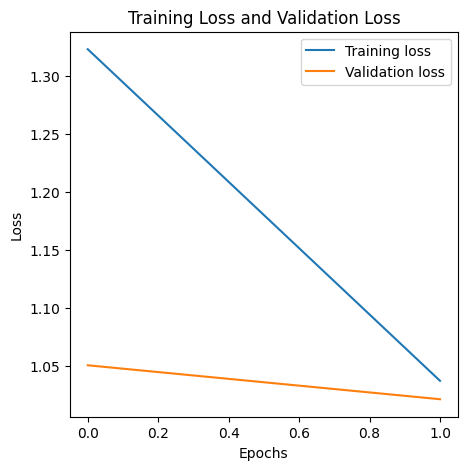

In [28]:
# Plotting the Training loss and Validation Loss
 
plt.figure(figsize = (5, 5))
plt.plot(training_resnet_50_model_1.history["loss"], label = "Training loss")
plt.plot(training_resnet_50_model_1.history["val_loss"], label = "Validation loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"], loc = "upper right")
plt.show()


In [29]:
# Making prediction of resnet_50_model

predicted = resnet_50_model_1.predict(test_set)
final_predictions = np.argmax(predicted, axis = 1)
final_predictions

3/3 [==============================] - 9s 2s/step


array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1],
      dtype=int64)

1/1 [==============================] - 4s 4s/step


C:\Users\admin\AppData\Local\Temp\ipykernel_908\2385852039.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


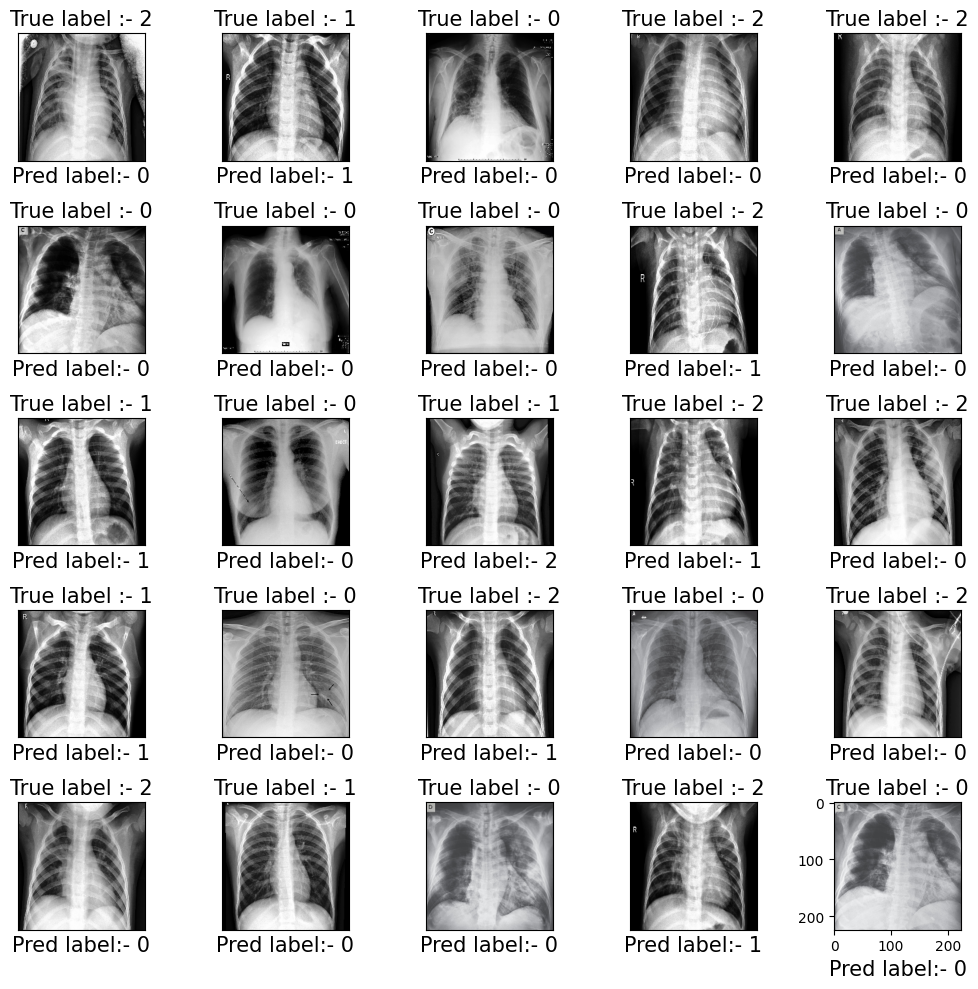

In [30]:
# Get a batch of images and true labels from the test_set
batch_images, true_labels = next(test_set)
true_labels = true_labels.argmax(axis=1)  # Convert one-hot encoded labels to integer labels

# Model prediction
predictions = resnet_50_model_1.predict(batch_images)
predicted_labels = np.argmax(predictions, axis=1)


plt.figure(figsize = (10, 10))
for i in range(0, 25, 1):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5, 5, i + 1)
    plt.imshow(batch_images[i])
    plt.title(f"True label :- {true_labels[i]}", fontsize = 15)
    plt.xlabel(f"Pred label:- {predicted_labels[i]}", fontsize = 15)

plt.tight_layout()
plt.show()

In [31]:
# Creating custom model 2

model_2 = Sequential(
    [
        layers.Conv2D(input_shape = (224, 224, 3), filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = "valid", data_format = None,
            dilation_rate = (1, 1), groups = 1, activation = "relu", use_bias = True,
            kernel_initializer = "glorot_uniform", bias_initializer = "zeros", 
            kernel_regularizer = None, bias_regularizer = None, activity_regularizer = None,
            kernel_constraint = None, bias_constraint = None),
        layers.MaxPooling2D(pool_size = (2, 2), strides = None, padding = "valid", data_format = None),
        layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = "valid", data_format = None),
        layers.MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid", data_format = None),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(units = 3, activation = "softmax", use_bias = True, kernel_initializer = "glorot_uniform",
        bias_initializer = "zeros", kernel_regularizer = None, bias_regularizer = None,
        activity_regularizer = None, kernel_constraint = None, bias_constraint = None)
    ]
)

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 108, 108, 32)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 373248)            0         
                                                                 
 dropout (Dropout)           (None, 373248)           

In [32]:
model_2.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [33]:
training_2 = model_2.fit(
    train_set,
    callbacks = [early_stopping],
    steps_per_epoch = 7,
    epochs = 2,
    validation_data = validation_set
)

Epoch 1/2
7/7 [==============================] - 18s 2s/step - loss: 4.6459 - accuracy: 0.5274 - val_loss: 1.8741 - val_accuracy: 0.3800
Epoch 2/2
7/7 [==============================] - 15s 2s/step - loss: 0.6717 - accuracy: 0.7811 - val_loss: 0.8355 - val_accuracy: 0.7600


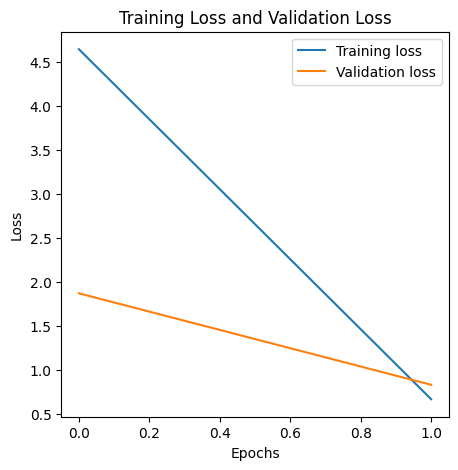

In [34]:
# Plotting the Training loss and Validation Loss
 
plt.figure(figsize = (5, 5))
plt.plot(training_2.history["loss"], label = "Training loss")
plt.plot(training_2.history["val_loss"], label = "Validation loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"], loc = "upper right")
plt.show()

1/1 [==============================] - 0s 337ms/step


C:\Users\admin\AppData\Local\Temp\ipykernel_908\3711567627.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


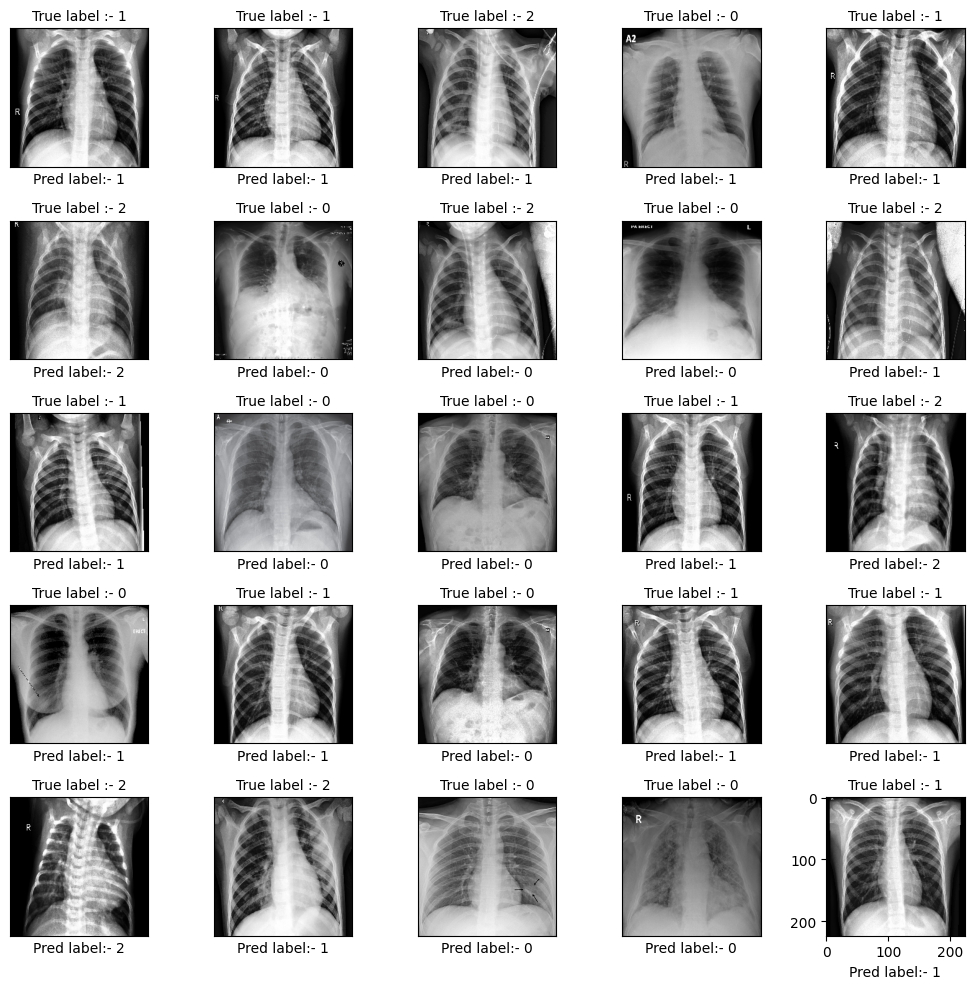

In [36]:
# Get a batch of images and true labels from the test_set
batch_images, true_labels = next(test_set)
true_labels = true_labels.argmax(axis=1)  # Convert one-hot encoded labels to integer labels

# Model prediction
predictions = model_2.predict(batch_images)
predicted_labels = np.argmax(predictions, axis=1)


plt.figure(figsize = (10, 10))
for i in range(0, 25, 1):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5, 5, i + 1)
    plt.imshow(batch_images[i])
    plt.title(f"True label :- {true_labels[i]}", fontsize = 10)
    plt.xlabel(f"Pred label:- {predicted_labels[i]}", fontsize = 10)

plt.tight_layout()
plt.show()

In [37]:
# Evaluate the model on the test data set

loss, accuracy = resnet_50_model_1.evaluate(test_set, verbose = 0)

# Evaluation result
print("ResNet-50 Test loss: ", loss)
print("ResNet-50 Test accuracy: ", accuracy)

loss, accuracy = model_2.evaluate(test_set, verbose = 0)

# Evaluation result
print("Custom model 1 Test loss: ", loss)
print("Custom model 1 Test accuracy: ", accuracy)

ResNet-50 Test loss:  0.9966859817504883
ResNet-50 Test accuracy:  0.6212121248245239
Custom model 1 Test loss:  1.1712547540664673
Custom model 1 Test accuracy:  0.7727272510528564


In [38]:
# Generate the predictions from the resnet-50 model
predictions = resnet_50_model_1.predict(test_set)

# Convert the prediction probabilities to class labels
predicted_labels = np.argmax(predictions, axis = 1)

# Getting the true labels from the test generator
true_labels = test_set.classes

# Classification repor calculations
print("Classification Report Resnet-50:- ")
report = classification_report(true_labels, predicted_labels, target_names = test_set.class_indices.keys(), zero_division = 0)
print(report)

3/3 [==============================] - 8s 2s/step
Classification Report Resnet-50:- 
                 precision    recall  f1-score   support

          Covid       0.36      0.58      0.44        26
         Normal       0.22      0.25      0.23        20
Viral Pneumonia       0.00      0.00      0.00        20

       accuracy                           0.30        66
      macro avg       0.19      0.28      0.22        66
   weighted avg       0.21      0.30      0.24        66



In [39]:
# Generate the predictions from the custom model 2
predictions = model_2.predict(test_set)

# Convert the prediction probabilities to class labels
predicted_labels = np.argmax(predictions, axis = 1)

# Getting the true labels from the test generator
true_labels = test_set.classes

# Classification repor calculations
print("Classification Report of custom model 2:- ")
report = classification_report(true_labels, predicted_labels, target_names = test_set.class_indices.keys(), zero_division = 0)
print(report)

3/3 [==============================] - 1s 265ms/step
Classification Report of custom model 2:- 
                 precision    recall  f1-score   support

          Covid       0.28      0.27      0.27        26
         Normal       0.33      0.55      0.42        20
Viral Pneumonia       0.12      0.05      0.07        20

       accuracy                           0.29        66
      macro avg       0.25      0.29      0.25        66
   weighted avg       0.25      0.29      0.26        66



3/3 [==============================] - 9s 2s/step


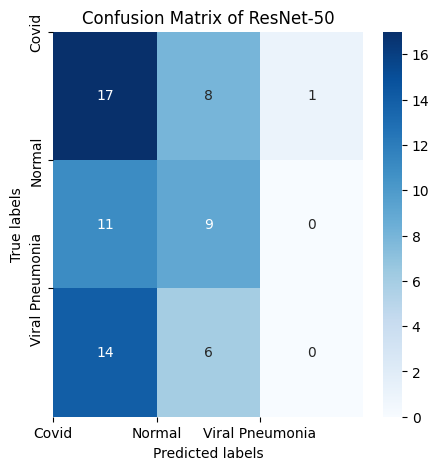

In [40]:
# Generate the predictions from the resnet-50 model
predictions = resnet_50_model_1.predict(test_set)

# Convert the prediction probabilities to class labels
predicted_labels = np.argmax(predictions, axis = 1)

# Getting the true labels from the test generator
true_labels = test_set.classes
# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize = (5, 5))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap ="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix of ResNet-50")
plt.xticks(ticks = np.arange(len(test_set.class_indices)), labels = test_set.class_indices.keys())
plt.yticks(ticks = np.arange(len(test_set.class_indices)), labels = test_set.class_indices.keys())
plt.show()

3/3 [==============================] - 2s 279ms/step


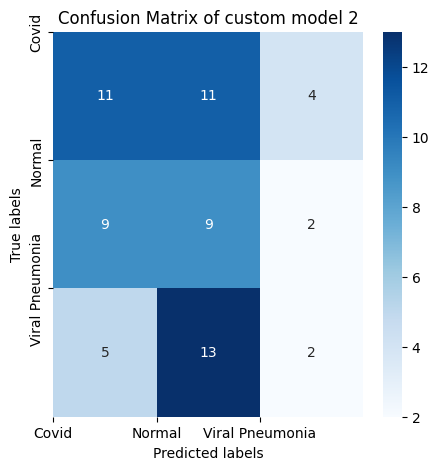

In [41]:
# Generate the predictions from the custom model 2
predictions = model_2.predict(test_set)

# Convert the prediction probabilities to class labels
predicted_labels = np.argmax(predictions, axis = 1)

# Getting the true labels from the test generator
true_labels = test_set.classes

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize = (5, 5))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap ="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix of custom model 2")
plt.xticks(ticks = np.arange(len(test_set.class_indices)), labels = test_set.class_indices.keys())
plt.yticks(ticks = np.arange(len(test_set.class_indices)), labels = test_set.class_indices.keys())
plt.show()

### Conclusion:-

Resnet-50 pretrained model are performing well than custom CNN model.